
# [KDT] ch6 Classification

### LogisticRegression / Decision Tree / Naive Bayes / KNN 

 - 데이터셋: 직장인 연봉 정보 / 붗꽃 / 다이아몬드 / 타이타닉  
 - 주요 라이브러리: sklearn linear_model / 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파일 로딩 
df_hk = pd.read_csv('c:ktd_2_data230224/hk_221206.csv')

## $\alpha$(알파) 퀴즈: 
<br>직장인 데이터셋과 해당 인원들의 차량 소유 데이터셋을 바탕으로 분류 분석을 계획 중이다. 
<br>이를 위해 먼저 분류 분석을 위한 전처리 과정을 진행하고자 한다.

<br>기본 데이터셋 df_hk에 차량 소유 데이터셋을 join한다.( 차량 소유 데이터 파일은 hk_221206_car.csv 이며 left 조인) 
<br>차량 정보는 배기량에 의해 A/B/C/D/E/F 타입으로 되어 있으며 차량이 없는 경우 none으로 되어 있다. 
<br>6개 차량 타입을 A, B 인 경우 SS로 변경, C, D 인 경우 MM로 변경, E, F인 경우 LL로 변경한다.(컬럼명은 car_type 동일)
<br>car_type이 none인 경우 결측치로 판단하여 제외한다. 
<br>전처리 후 데이터 셋 명칭을 basetable1으로 명명한다. 
<br>
<br><b>문제: car_type별 연봉 평균을 각각 구하시오(SS/MM/LL 3가지 경우 확인) </b>

In [4]:
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [5]:
# car 파일 로딩 
df_hk_car = pd.read_csv('c:ktd_2_data230224/hk_221206_car.csv')

In [6]:
df_hk_car[:2]

,name,car_type
0,hkd1,none
1,hkd10,B


In [7]:
# merge, left join  or concat
df_hk = pd.merge(left=df_hk,right=df_hk_car)
df_hk

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,none
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,B
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,D
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,A
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,B
...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,D
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,D
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,D
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,E


In [8]:
# map or replace
# 6개 차량 타입을 A, B 인 경우 SS로 변경, C, D 인 경우 MM로 변경, E, F인 경우 LL로 변경한다.(컬럼명은 car_type 동일)
df_hk['car_type'] = df_hk['car_type'].map({'A':'SS','B':'SS','C':'MM','D':'MM','E':'LL','F':'LL'})
df_hk[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,NaN
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,SS


In [9]:
df_hk.isna().sum()

name            0
jumin7          0
gender          0
height          0
age             0
blood_type      0
company         0
grades          0
salary          0
expenditure     0
car_type       14
dtype: int64

In [10]:
df_hk = df_hk.drop(['level_0','index'],axis=1)
df_hk

KeyError: "['level_0' 'index'] not found in axis"

In [11]:
# df_hk = df_hk.dropna().reset_index()
df_hk.isna().sum()
df_hk['car_type'].value_counts()

basetable1 = df_hk.copy()
basetable1

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,NaN
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,SS
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,MM
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,SS
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,MM
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,MM
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,MM
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,LL


## 1. 로지스틱 회귀분석 워밍업

<br> <진행순서>
<br> basetable1 236개 샘플을 활용하여 
<br> 1. 종속변수를 gender
<br> 2. 독립변수 height, age, salary, expenditure 4개로 구성하는 로지스틱 회귀분석을 설계 
<br> 3. 독립변수 4개별 회귀계수를 확인하시오 
<br>
<br>from sklearn.linear_model import LogisticRegression 활용 
<br>(파라미터 가이드: Seed=1234, Solver='newton-cg', 나머지: Default)
<br>

### Chat GPT

Q) solver의 역할이 뭔가요

A) 
solverLogisticRegression최적화에 사용할 알고리즘을 지정하는 scikit-learn 클래스의 매개변수입니다 . 즉, 모델에 대한 최상의 계수를 찾는 데 사용되는 방법을 결정합니다.

솔버의 선택은 속도와 정확도 측면에서 모델의 성능에 큰 영향을 미칠 수 있습니다. 일부 솔버는 더 작은 데이터 세트에 더 적합하고 다른 솔버는 더 큰 데이터 세트 또는 많은 수의 기능이 있는 데이터 세트에 더 적합합니다.

scikit-learn에서 사용 가능한 솔버는 'newton-cg', 'lbfgs', 'liblinear', 'sag' 및 'saga'입니다. 각 솔버에는 고유한 강점과 약점이 있으므로 문제에 적합한 솔버를 선택하는 것이 중요합니다. 예를 들어 'newton-cg' 및 'lbfgs'는 많은 수의 기능이 있는 문제에 적합한 선택인 반면 'liblinear'는 더 작은 데이터 세트에 적합한 선택입니다.

In [12]:
# step1) LogisticRegression 클래스 호출
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [13]:
# step2) ['gender','height', 'age', 'salary', 'expenditure'] df_hk 생성

df_hk_0 = basetable1[['gender','height', 'age', 'salary', 'expenditure']]
df_hk_0

,gender,height,age,salary,expenditure
0,F,161.9,22,4100,1975
1,F,169.4,31,4720,2970
2,F,168.3,55,7280,5905
3,F,155.3,28,4060,2935
4,M,188.6,29,4390,4015
...,...,...,...,...,...
245,F,157.8,50,6990,4865
246,F,150.4,51,7110,4985
247,M,172.4,52,8000,6625
248,M,166.7,53,8760,7385


In [14]:
# step2) LogisticRegression 모델생성,  Seed=1234, Solver='newton-cg'
model_1 = LogisticRegression(random_state=1234, solver='newton-cg').fit(df_hk_0.drop('gender' ,axis=1), df_hk_0['gender'])

In [15]:
# LogisticRegression 모델 attribute
model_1

LogisticRegression(random_state=1234, solver='newton-cg')

In [16]:
# coef_
model_1.coef_

array([[ 4.02879683e-01, -6.42589252e-02, -1.12637825e-04,
         4.75953442e-04]])

In [17]:
# feature_names_in_


In [18]:
# step3) 독립변수 4개별 회귀계수(coef) 확인
pd.DataFrame({'feature':['height', 'age', 'salary', 'expenditure'],'coef':model_1.coef_[0]})

,feature,coef
0,height,0.402880
1,age,-0.064259
2,salary,-0.000113
3,expenditure,0.000476


신장이 1cm 늘어날시 결과에 미치는 영향력이 0.3775이 아님에 유의 
<br> 로그가 붙어 있는 오즈비이기 때문에 타깃에 미치는 영향력을 직관적으로 알기 위해서는 로그를 떼어내고 해석해야 함

 $$ Log \left\{ \frac{ p  }{ 1-p   }\right\}  = -62.4681 + 0.3775\times height + (-0.0571)\times age + (-0.0001) \times salary + 0.0004 \times expenditure $$

### 관련 식을 Target 관련 확률로 변환 
#### $$ p = \frac{1}{1+\exp(-1\times(-62.4681 + (0.3775)\times height + (-0.0571)\times age + (-0.0001) \times salary + 0.0004 \times expenditure))} $$
p 가 0.5 이상일 경우 1 / 0.5 미만이면 0으로 분류(cut-off 임계치는 수정 가능) 


## 1-0. 로지스틱 회귀분석 statemodels 활용

특정 자동차 모델 예측모델 만들기 

In [19]:
from statsmodels.formula.api import logit
from statsmodels.formula.api import logit

In [20]:
basetable1[:3]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,NaN
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,SS
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,MM


<br> <진행순서>
<br>1. 전체 데이터 셋 중 차량 소유자만 대상 (미소유자 drop)
<br>2. 종속변수 : car_type LL을 1로 나머지는 0으로 변환한 후 car_type 변수에 그대로 저장 할 것 
<br>3. 독립변수 : 성별, 회사 2개의 명목형 변수를 더미 변수화( drop_first 옵션 Ture) 독립변수 총 개수는 수치형 4개 더미 3개 총 7개 
<br>4. 로지스틱 회귀분석 모델을 만드시오. 라이브러리 및 메소드는 statsmodels.formula.api 활용 할 것 

In [21]:
# step1) car_type null 확인
basetable1.isna().sum()

name            0
jumin7          0
gender          0
height          0
age             0
blood_type      0
company         0
grades          0
salary          0
expenditure     0
car_type       14
dtype: int64

In [22]:
# step2) car_type 변경 (LL -> 1, else 0)
basetable1['car_type'] = np.where(basetable1['car_type'] == 'LL', 1, 0)
basetable1[:3]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0


In [23]:
# step3) 성별, 회사 2개의 명목형 변수 더미 변수화( drop_first 옵션 Ture) 

df_hk_1 = pd.get_dummies(data = basetable1, columns=['gender','company'], drop_first=True)
df_hk_1[:5]

,name,jumin7,height,age,blood_type,grades,salary,expenditure,car_type,gender_M,company_B,company_C
0,hkd1,990623-2,161.9,22,A,A,4100,1975,0,0,0,0
1,hkd10,900303-2,169.4,31,A,B,4720,2970,0,0,0,0
2,hkd100,681205-2,168.3,55,A,B,7280,5905,0,0,0,0
3,hkd101,931226-2,155.3,28,AB,B,4060,2935,0,0,1,0
4,hkd102,920123-1,188.6,29,O,F,4390,4015,0,1,1,0


In [24]:
# concat


In [25]:
# step4) 로지스틱 회귀분석 모델
# case1) statsmodels.formula.api

from statsmodels.formula.api import logit
# formula 생성
model_logit = logit(formula='car_type ~ height + age + salary + expenditure + gender_M + company_B + company_C', data=df_hk_1).fit()
model_logit

Optimization terminated successfully.
         Current function value: 0.123817
         Iterations 10


In [26]:
# case2) statsmodels.api
# sm.add_constant intercept

import statsmodels.api as sm
model_smlogit = sm.Logit(endog = df_hk_1['car_type'], exog=df_hk_1[['age' , 'height' , 'salary' , 'expenditure' , 'gender_M' , 'company_B' , 'company_C']])
model_smlogit

statsmodels sm 라이브러리의 Logit 메소드는 확률 값으로 도출 

In [27]:
# predict 확률값을 반환


In [28]:
# predict 확률값을 반환
model_smlogit.predict(params=df_hk_1, exog=df_hk_1[['age' , 'height' , 'salary' , 'expenditure' , 'gender_M' , 'company_B' , 'company_C']])

ValueError: shapes (250,7) and (250,12) not aligned: 7 (dim 1) != 250 (dim 0)

In [ ]:
# -------------------------------------


## 1-1. 로지스틱 회귀분석 sklearn 라이브러리 활용 1

<br> <진행순서>
<br>1. basetable1을 사용하시오.
<br>2. 종속변수 : car_type LL을 1로 나머지는 0으로 변환한 후 car_type 변수에 그대로 저장 할 것 
<br>3. 독립변수 : 'salary', 'expenditure' 2개 
<br>4. 로지스틱 회귀분석 모델을 만드시오. 라이브러리 및 메소드는 sklearn 활용 할 것 (C=100000 ,solver='newton-cg')
<br> 설명: C=100000: 정규화(L1, L2규제) 강도의 역수; 양의 실수, 값이 작을수록 더 강력한 정규화 지정
<br>5. 로지스틱 회귀분석 모델로 예측했을때 맞춘것과 틀린 갯수는

In [29]:
# step1) basetable1로 df_hk 생성
df_hk1_1 = basetable1[['car_type','salary', 'expenditure']]


In [30]:
# step2) car_type 변경 (LL -> 1, else 0) 


In [31]:
# step4) sklearn 로지스틱 회귀분석 모델 (C=100000 ,solver='newton-cg') 
from sklearn.linear_model import LogisticRegression

model1_1 = LogisticRegression(C=100000 ,solver='newton-cg').fit( X = df_hk1_1[['salary', 'expenditure']],
                                                      y = df_hk1_1['car_type'])

In [32]:
# 로지스틱 회귀 attributes 


In [33]:
# coef_
model1_1.coef_

array([[0.00028196, 0.0010813 ]])

In [34]:
# 로지스틱 회귀 coef
model1_1.intercept_

array([-9.94616001])

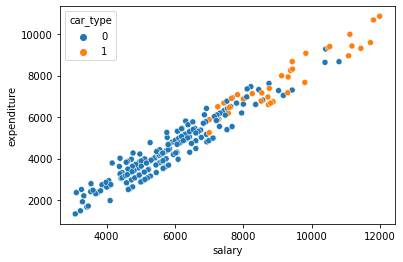

In [35]:
# 시각화 
sns.scatterplot( x="salary", y="expenditure", hue = 'car_type', data =df_hk1_1)
plt.show()

### $$ Log \left\{ \frac{ p  }{ 1-p   }\right\}  = -9.8831 + 0.0003\times salary + 0.0011\times expenditure $$

### 관련 식을 Target 관련 확률로 변환 
### $$ p = \frac{1}{1+\exp-1\times(-9.8831+(0.0003)\times salary + 0.0011 \times expenditure))} $$
p 가 0.5 이상일 경우 1 / 0.5 미만이면 0으로 분류(cut-off 임계치는 수정 가능) 

In [36]:
# 확률(p) 계산식
def linear(x1, x2):
    p = 1 / ( 1+ np.exp(-1 * (-9.883112+(0.000284)*x1+(0.001069)*x2)))
    return p

In [37]:
# row 3 데이터
df_hk_1.iloc[3, :]

name             hkd101
jumin7         931226-2
height            155.3
age                  28
blood_type           AB
grades                B
salary             4060
expenditure        2935
car_type              0
gender_M              0
company_B             1
company_C             0
Name: 3, dtype: object

In [38]:
# row 3 데이터 확률(p) 계산
linear(4390, 4015)

0.0128140398255603

In [39]:
# row 149 데이터
df_hk_1.iloc[149, :]

name             hkd233
jumin7         890422-1
height            173.5
age                  32
blood_type            B
grades                B
salary             7320
expenditure        6195
car_type              0
gender_M              1
company_B             0
company_C             1
Name: 149, dtype: object

In [40]:
# row 149 데이터 확률(p) 계산
linear(11080, 8955)

0.9446167977010641

In [41]:
#row 3에 대한 확률
model1_1.predict(X = df_hk_1[['salary', 'expenditure']])[3]

0

In [42]:
#row 149에 대한 확률
model1_1.predict(X = df_hk_1[['salary', 'expenditure']])[149]

0

In [43]:
#row 3에 대한 로지스틱 회귀분석 예측


In [44]:
#row 149에 대한 로지스틱 회귀분석 예측


In [45]:
# step5) 로지스틱 회귀분석 예측 평가, 예측중 맞춘것과 틀린 갯수는
df_hk1_1['pred_1_1'] = model1_1.predict(X = df_hk_1[['salary', 'expenditure']])
(df_hk1_1['car_type'] == df_hk1_1['pred_1_1']).sum()
print('정답 : ', (df_hk1_1['car_type'] == df_hk1_1['pred_1_1']).sum())
print('오답 : ', (df_hk1_1['car_type'] != df_hk1_1['pred_1_1']).sum())

정답 :  217
오답 :  33


In [46]:
pd.crosstab(df_hk1_1['car_type'], df_hk1_1['pred_1_1'])

pred_1_1,0,1
car_type,,
0,195,10
1,23,22


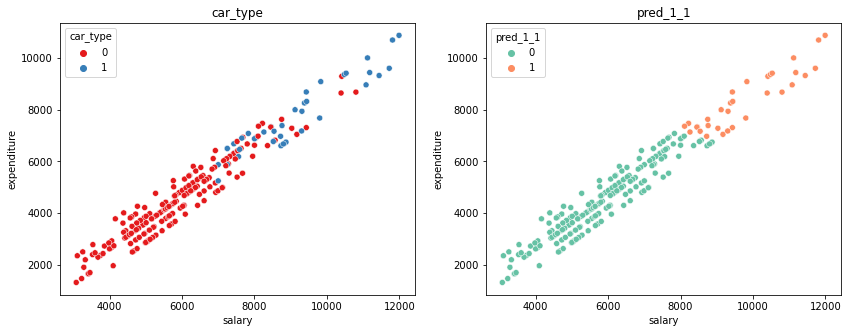

In [47]:
# 시각화
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot( data = df_hk1_1, x='salary', y='expenditure', hue = 'car_type',  palette='Set1', ax=ax[0] )
sns.scatterplot( data = df_hk1_1, x='salary', y='expenditure', hue = 'pred_1_1',  palette='Set2', ax=ax[1] )

ax[0].set_title('car_type')
ax[1].set_title('pred_1_1')
plt.show()


## 1-1. $\pi$(파이) Quiz  로지스틱 회귀분석 sklearn 라이브러리 활용 2

<br><실행순서>
<br> 1. basetable1을 사용하여 (236 rows × 11 columns) 
<br> 2. 종속변수 : 파생변수('target')을 생성하시오. car_type( LL 여부 yes:1, no:0) 
<br> 3. 독립변수 : salary, expenditure, company(dummy변수화, drop_first=True)
<br> 4. sklearn을 사용하여 로지스틱 회귀모델을 만들고 독립변수별 회귀계수를 구하시오 (C=100000 ,solver='newton-cg')
<br> 5. salary ( 6660 ), expenditure ( 5285 ), company(B) 일때 값을 예측하시오

In [48]:
basetable1[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0


In [49]:
# step1) df_hk생성

# step2) 파생변수('target') 생성. car_type( LL 여부 yes:1, no:0)

# value_counts 로 확인

# step3) 독립변수 salary, expenditure, company(dummy변수화, drop_first=True)

# 로지스틱 회귀모델 생성(C=100000 ,solver='newton-cg'), 회귀계수 

# intercept_

# coef_

# feature_names_in_

# 회귀계수


로지스틱 회귀계수 산출식 

## $ Log \left\{ \frac{ p  }{ 1-p   }\right\}  = \beta_0 + \beta_1X $ &emsp; →&emsp;&emsp;   $ p = \frac{1} {1 + e^{-(\beta_0 +\beta_1X)}}$

모델을 바탕으로 산출식에 적용 

$$ Log \left\{ \frac{ p  }{ 1-p   }\right\}  = -28.989 + 0.003\times salary + 0.001\times expenditure + 3.956\times company B + (-7.756) \times company C $$

위 식을 target 1에 해당하는 확률값으로 변환하면?

$$ p = \frac{1}{1+\exp(-1\times(-28.989 + 0.003\times salary + 0.001\times expenditure + 3.956\times company B + (-7.756) \times company C))} $$

In [ ]:
# 회귀식 예측


회귀식을 바탕으로 확률값 도출 

In [ ]:
# 회귀식 logistic_linear
def logistic_linear(x1, x2, x3, x4):
    p = 1 / ( 1+ np.exp(-1 * (-28.989+(0.0026)*x1+(0.001235)*x2+(3.955891)*x3)+(-7.756401)*x4))
    return p

In [ ]:
# sample data , df_hk1_2_dum.drop('target', axis=1).tail(2)


In [ ]:
# predict_proba로 확인, tail(2)


사용자 정의 함수를 통해 독립변수 값을 넣어주면 그에 해당하는 확률 값을 도출

In [ ]:
# 회귀식으로 확인 (8760, 7385, 0, 0 )


In [ ]:
# 회귀식으로 확인 (7470, 6095, 0, 0 )


In [ ]:
# step5) 회귀식으로 salary ( 6660 ), expenditure ( 5285 ), company(B) 일때 값 예측


In [ ]:
# step5) predict, predict_proba로 ( 6660 ), expenditure ( 5285 ), company(B) 일때 값 예측


## 1-2 로지스틱 회귀분석 평가 1/2

df_hk1_2_dum 데이터셋을 바탕으로 train test 셋 7:3으로 분할
<br> 해당 모델을 바탕으로 얼마나 정확하게 분류하는지 평가 
<br> Accuracy, Precision, Recall, F1_score

In [ ]:
df_hk1_2_dum[:5]

In [ ]:
# train, test로 분할
from sklearn.model_selection import train_test_split


In [ ]:
# predict


In [ ]:
# value_counts


### Accuracy = $$\frac{TP+TN}{TP+TN+FP+FN}$$

### Precision = $$\frac{TP}{TP+FP}$$

### Recall = $$\frac{TP}{TP+FN}$$

### F1 = $$\frac{2\times Precision \times Recall}{Precision+Recall}$$

In [ ]:
# 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# crosstab(predict_1, df_hk_test_1['target'])


In [ ]:
# 평가지표 계산
accuracy_s = 
precision_s = 
recall_s = 
f1_s = 

print('accuracy_s =', accuracy_s)
print('precision_s =', precision_s)
print('recall_s =', recall_s)
print('f1_s =', f1_s)

In [ ]:
# 평가지표 계산
# y_true, y_pred 순서 중요

print( "Accuracy : ", )
print( "Precision : ", )
print( "Recall : ", )
print( "F1 : ", )

In [ ]:
# classification_report
from sklearn.metrics import classification_report



## 1-2 로지스틱 회귀분석 평가 2/2 

ROC AUC score 도출
<br>ROC curve 도출 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# predict_proba중 1의 확률 도출


In [ ]:
# predict_proba중 1의 확률


In [ ]:
# roc_auc_score


ROC curve 도출 
<br> <b>x축  FPR</b> = FP / (FP + TN) = 1 - TNR = 1 - 특이성
<br> <b>y축  TPR</b> = Recall

In [ ]:
# roc_curve


In [ ]:
# 시각화, roc_curve 
plt.plot( fprs, tprs, label='ROC') #ROC 곡선 그리기
plt.plot([0,1], [0,1], 'k--', label='Random') # 가운데 대각선 그리기 
plt.legend()

## 1-3 로지스틱 회귀 분석 다항 분석 

회사 예측 하기  
로지스틱 회귀 분석시 타깃 항목값은 0 또는 1이었다. 만약 타깃 종류가 2가지가 아닌 3가지 이상이면 어떻게 해야 할까? 

<br><b>종속변수</b> : car_type(SS/MM/LL) 
<br><b>독립변수</b> : age, salary, expenditure, company(drop_first=True)

옵션값 - C=100000 , solver='newton-cg' 

In [ ]:
basetable1

In [ ]:
# df_hk생성, car_type, age, salary, expenditure, company(drop_first=True)


In [ ]:
# train, test분리


In [ ]:
# 다항 로지스틱회귀 모델 생성, multi_class='multinomial' or default auto


In [ ]:
# 다항 로지스틱회귀 모델 예측


In [ ]:
# 다항 로지스틱회귀 모델 예측값


In [ ]:
# 다항 로지스틱회귀 모델 예측값


In [ ]:
# 다항 로지스틱회귀 모델 평가표


## 2. $\pi$(파이) Quiz 로지스틱 회귀분석 - 붓꽃 데이터 셋 활용 
sklearn 라이브러리 활용을 통한 붓꽃 품종 분류 

In [ ]:
# 파일 로딩
df_iris = pd.read_csv('.\\data\\iris.csv')
df_iris

In [ ]:
# 시각화
fig = plt.figure( figsize=(6,6))

sns.scatterplot( x='sepal_length', y='petal_length', hue='species', data= df_iris)
plt.show()

<br>1. 종속변수는 species, species가 virginica 여부인지 구분하는 파생변수('target') 를 만드시오 
<br>2. 독립변수는 'sepal_length', 'sepal_width',	'petal_length',	'petal_width' 4개 변수로 하되 
       정규화(StandardScaler)하여 사용하시오 
<br>3. train, test 분류할 필요 없이 150개 샘플을 사용하고 150개 샘플 그대로 로지스틱 회귀모델에 적용해 예측하시오
<br>4. virginica 예측 분류 모델 관련 재현율을 구하시오
<br>( sklearn.liner_model LogisticRegression 활용 파라미터 값 C=100000 , random_state = 123, solver='newton-cg' 나머지 디폴트)

In [ ]:
# step1) 종속변수 species 중 virginica 여부 를 분류하는 파생변수('target') 생성


# value_counts로 확인


# step2) 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' 정규화(StandardScaler)


# StandardScaling df화


# step3) LogisticRegression


# step3) LogisticRegression predict


# step4) recall_score

# crosstab 확인


## 3_1. Decision Tree (DecisionTreeClassifier)

<br><b>종속변수</b> : car_type
<br><b>독립변수</b> : gender, height, age, salary, expenditure, company(명목변수 모두 더미변수화)
<br>train_test_split(random_state=123, train_size=0.7)

In [ ]:
# 파일 로딩
basetable1

In [ ]:
# dummy ('gender', 'company')


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
train_df_hk_3, test_df_hk_3 = train_test_split( df_hk3, random_state=123, train_size=0.7)

In [ ]:
# DecisionTreeClassifier 호출

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# feature_importances_  종속변수(car_type에 영향을 미치는 정도) -> feature_importances_로 분기 한다


In [ ]:
# feature_importances_


In [ ]:
# feature_importances_시각화
sns.barplot( x='imp', y='feature', data=model_imp.head(10))
plt.show()

In [ ]:
# plot_tree 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(35,10))
a = plot_tree(model_3, 
              feature_names= model_3.feature_names_in_,          # feature_names display
              class_names =  train_df_hk_3['car_type'].unique(), # class_names display
              filled=True,                                       # color
              rounded=True,
              max_depth= 4,                                      # display max_depth= 4
              fontsize=14)

In [ ]:
# 최초 165개 데이터셋 중 expenditure <= 4242.5 69개 샘플 


In [ ]:
#69개 데이터셋 중 age <= 37.5 인경우


In [ ]:
#69개 데이터셋 중 age > 37.5 인경우


In [ ]:
# predict


In [ ]:
# classification_report (tree)
from sklearn.metrics import classification_report


In [ ]:
# skip
# 시각화
fig = plt.figure( figsize=(6,6))

sns.scatterplot( x='age', y='expenditure', hue='car_type', data= train_df_hk_3)
plt.show()

## 3_2. $\pi$(파이) Quiz Decision Tree (DecisionTreeRegressor)

<br><실행순서>
<br>basetable1을 사용
<br>1.<b>종속변수</b> : expenditure
<br>2.<b>독립변수</b> : gender, height, age, salary, company(명목변수 모두 더미변수화)
<br>3.train_test_split(random_state=123, train_size=0.7)
<br>4.test data에 대해 예측하고 mean_squared_error를 구하시오 
<br>5.DecisionTreeRegressor사용 (DecisionTreeRegressor( max_depth= 4, min_samples_split= 5, random_state= 1234))

In [ ]:
# 파일 로딩
basetable1[:2]

In [ ]:
# max_depth= 4
# dummy ('gender', 'company')


# train_test_split
from sklearn.model_selection import train_test_split

# DecisionTreeRegressor 호출( max_depth= 4, min_samples_split= 5, random_state= 1234)


# fit

# predict

# 평가 report


In [ ]:
# feature_importances_  종속변수(car_type에 영향을 미치는 정도) -> feature_importances_로 분기 한다


# feature_importances_

# feature_importances_시각화
sns.barplot( x='imp_2', y='feature', data=model_imp_2.head(10))
plt.show()

In [ ]:
# plot_tree 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(model_3_2, 
              feature_names= model_3_2.feature_names_in_, 
              class_names =  train_df_hk_3_2['expenditure'].unique(), 
              filled=True, 
              rounded=True,
              max_depth= 3, 
              fontsize=14)

In [ ]:
# 시각화 DecisionTreeRegressor
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot( x=test_df_hk_3_2['salary'], y=test_df_hk_3_2['expenditure'], palette='Set1', ax=ax[0] )
sns.scatterplot( x=test_df_hk_3_2['salary'], y=pred_tree_3_2                , palette='Set2', ax=ax[1] )

ax[0].set_title('expenditure')
ax[1].set_title('predict_tree')
plt.show()

In [ ]:
# max_depth= 7
# dummy ('gender', 'company')

# train_test_split
from sklearn.model_selection import train_test_split

# DecisionTreeRegressor 호출( max_depth= 4, min_samples_split= 5, random_state= 1234)
from sklearn.tree import DecisionTreeRegressor

# fit

# predict

# 평가 report
from sklearn.metrics import mean_squared_error


In [ ]:
# 시각화 DecisionTreeRegressor( max_depth= 4와 max_depth= 7) 비교
fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(14, 5))
sns.scatterplot( x=test_df_hk_3_2['salary'], y=test_df_hk_3_2['expenditure'], palette='Set1', ax=ax[0] )
sns.scatterplot( x=test_df_hk_3_2['salary'], y=pred_tree_3_2                , palette='Set2', ax=ax[1] )
sns.scatterplot( x=test_df_hk_3_2['salary'], y=pred_tree_3_2_7                , palette='Set2', ax=ax[2] )


ax[0].set_title('expenditure')
ax[1].set_title('predict_tree_4')
ax[2].set_title('predict_tree_7')

plt.show()

## 4-1. Naive Bayes 분류 실습 

참고 URL : https://todayisbetterthanyesterday.tistory.com/17

#### $\displaystyle P(y|X)=\frac{P(X|y)P(y)}{P(X)}$ &emsp;&emsp;&emsp;&emsp;    $\mbox{Posterior}=\frac{\mbox{(Likelihood)}\mbox{(Proposition prior probability)}}{\mbox{Evidence prior probability}}$

 $$P\left(y|x_{1},x_{2},\ldots,x_{n}\right)= \frac{P\left(x_{1},x_{2},\ldots,x_{n}|y\right)P(y)}{x=\left(x_{1},x_{2},\ldots,x_{n}\right)} $$

$$= \frac{P(x_1|y)P(x_2|y)P(x_3|y)...P(x_p|y)P(y)}{P(x)}$$

나이브 베이즈 분류에는 대표적으로 2가지 경우가 존재 

<br> 1. 설명변수가 연속형 변수일 때, <b>Gaussian Naive Bayes</b> (가우시안 나이브 베이즈)
<br> 2. 설명변수가 범주형 변수일 때, <b>Multinomial Naive Bayes</b> (다항 나이브 베이즈) 

<br> train_df_hk_3, test_df_hk_3 테이블 사용
<br><b>종속변수</b> : car_type
<br><b>독립변수</b> : gender, height, age, salary, expenditure, company(명목변수 모두 더미변수화)

In [ ]:
# 파일 로딩  train_df_hk_3
train_df_hk_3[:5]

In [ ]:
# GaussianNB, MultinomialNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
# car_type예측, MultinomialNB() 모델링


In [ ]:
# fit


In [ ]:
# predict


In [ ]:
# predict_proba, 확률값


In [ ]:
# classification_report (MultinomialNB)


In [ ]:
# classification_report (tree)
from sklearn.metrics import classification_report


## 4-2. $\pi$(파이) Quiz Naive Bayes 회귀 실습

<br><실행순서>
<br>1. basetable1 사용
<br>2. 종속변수 : expenditure
<br>3. 독립변수 : gender, height, age, company, salary (명목형변수 dummy화)
<br>4. train_test_split(random_state=123, train_size= 0.7)
<br>5. 나이브베이즈 GaussianNB()으로 모델링 하고 예측하여 mse를 구하시오

In [ ]:
# step1) 파일 로딩
basetable1

# step2) 필요 데이터 프레임 생성 (종속변수 : expenditure 독립변수 : gender, height, age, company, salary)


# step3) dummy화


# step4) train_test_split(random_state=123, train_size= 0.7)

# step5) GaussianNB() 모델링
from sklearn.naive_bayes import GaussianNB, MultinomialNB


# fit


# GaussianNB() 예측

# GaussianNB() 평가, mean_squared_error
from sklearn.metrics import mean_squared_error


## 5. K-Nearest Neighbor


<br>train_df_hk_3, test_df_hk_3 사용
<br><b>종속변수</b> : car_type
<br><b>독립변수</b> : height, age, salary, expenditure(정규화 시행), 성별(더미변수만 추가) 

In [ ]:
# 파일 로딩
train_df_hk_3
test_df_hk_3

In [ ]:
# train dataset 준비,  StandardScaling, concat

# StandardScaling ['height', 'age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler


# train.transform, pd.DataFrame


# train concat, reset_index(drop=True) 기존 index 삭제


In [ ]:
# test dataset 준비,  train StandardScaler 적용, concat

# test.transform, pd.DataFrame


# test concat, reset_index(drop=True) 



In [ ]:
# train, test df 생성 , ['car_type', 'height_st', 'age_st', 'salary_st', 'expenditure_st', 'gender_F', 'gender_M']


In [ ]:
# KNeighborsClassifier 호출
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNeighborsClassifier 모델링(n_neighbors=3), fitting


In [ ]:
# KNeighborsClassifier 예측


In [ ]:
# KNeighborsClassifier 확률값


In [ ]:
# classification_report (KNeighborsClassifier)


In [ ]:
# classification_report (MultinomialNB)  비교


In [ ]:
# classification_report (tree) 비교


##  $\Sigma$ (시그마) Quiz

### quiz 1) diamond 데이터 셋 활용

다이아몬드 특성을 바탕으로 cut 분류 

데이터(diamonds.csv) 사이즈 : 53940 X 10
<br> 
<br> <b>carat:</b> weight of the diamond (0.2--5.01)
<br> <b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br> <b>color:</b> diamond colour, from D (best) to J (worst)
<br> <b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br> <b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br> <b>table:</b> width of top of diamond relative to widest point (43--95) 
<br> <b>price:</b> price in US dollars (us326--us18,823)
<br> <b>x:</b> length in mm (0--10.74)
<br> <b>y:</b> width in mm (0--58.9)
<br> <b>z:</b> depth in mm (0--31.8)

<br>
<br>
목표: 단가 높은 다이아몬드 판단하기  
<br>1. 캐럿당 가격을 알 수 있는 <b>carat_per_price</b> 합성변수 생성, carat_per_price = price / carat 
<br> 상위 25% 값인 약 4949.5997 보다 높으면 1, 나머지는 0 으로하는 target 변수 생성 
<br>2. cut, color, clarity one-hot인코딩(dummy) 진행 price 제외한 모든 수치형 변수 독립변수로 추가( 종속변수 제외, 총 26개 변수)
<br>3. 트레이닝 데이터셋, 테스트 데이터셋 7:3 비율로 생성(random_state=123)
<br>4. from sklearn.tree import DecisionTreeClassifier 활용 
<br>(불순도 기준: Gini, Max Depth: 6, Min Samples Splits: 5, Seed: 1234, 그 외: Default)
<br> 26개 독립변수를 활용하여 target을 분류 예측하는 의사결정 나무 모델 적합 
<br> 5. 테스트 셋(16,182 rows)을 바탕으로 예측하고 실제값과 비교해 f1_score를 구하시오(target 1 기준으로)

In [ ]:
# 파일 로딩
df_dia = pd.read_csv('.\\data\\diamonds.csv')
df_dia.head(3)

In [ ]:
# step1) 1. 캐럿당 가격을 알 수 있는 <b>carat_per_price</b> 합성변수 생성, carat_per_price = price / carat

# step1) 상위 25% 값인 약 4950 보다 높으면 1, 나머지는 0 으로하는 target 변수 생성

# value_counts

# step2) cut, color, clarity one-hot인코딩, price 제외한 모든 수치형 변수 독립변수로 추가( 종속변수 제외, 총 26개 변수)

# concat

# train_test_split(7:3 비율로 생성, random_state=123)
from sklearn.model_selection import train_test_split

# step4) DecisionTreeClassifier 활용 (불순도 기준: Gini, Max Depth: 6, Min Samples Splits: 5, Seed: 1234, 그 외: Default)
# 26개 독립변수를 활용하여 target을 분류 예측하는 의사결정 나무 모델 적합

from sklearn.tree import DecisionTreeClassifier

# predict

# crosstab

# step5) f1_score를 구하시오(target 1 기준으로)


In [ ]:
# feature_importances_ 확인

# 시각화
sns.barplot( x='imp_3', y='feature', data=model_imp_3.head(10))
plt.show()

의사결정 나무 시각화 

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(model_tree, 
              feature_names= model_tree.feature_names_in_, 
              class_names= str(dia_train['target'].unique()), 
              filled=True, 
              rounded=True,
              max_depth= 3, 
              fontsize=14)

### quiz 2)  와인 데이터 셋 활용

와인의 다양한 특성 바탕으로 KNN 분류 예측 모델 생성 

데이터(sklearn_wine.csv) 사이즈 : 178 X 14

<br><b>alcohol</b>: 알코올
<br><b>malic acid</b>: 말산
<br><b>ash</b> : 회분
<br><b>alcalinity of ash</b>: 회분의 알칼리도
<br><b>magnesium</b>: 마그네슘
<br><b>total phenols</b>: 총 폴리페놀
<br><b>color intensity</b>: 색상의 강도
<br><b>hue</b>: 색상 

등

목표: 와인의 화학적 특성을 바탕으로 와인 종류를 예측하기 
1. 종속변수는 target 변수에서 항목이 1일경우 1, 나머지는 0으로 하는 칼럼을 만들고 target 변수 그대로 덮어쓴다.
2. 독립변수는 13개 수치형 변수 그대로 활용하되 정규화(minmax)를 통해 단위를 통일한다. 
3. 트레이닝 데이터셋과 테스트 데이터 셋 7:3으로 분할 한다.(random_state = 123으로 설정) 
4. K-Nearest Neighbor 알고리즘을 활용하되 n_neighbor 수는 3으로 설정한다. 
5. 트레이닝 데이터셋을 바탕으로 모델을 학습하고 학습한 모델을 바탕으로 테스트 데이터셋을 분류 예측한다. 
6. recall 값과 f1값을 구하시오 

In [ ]:
# 파일 로딩
df_wine = pd.read_csv('.\\data\\sklearn_wine.csv').drop('Unnamed: 0', axis=1)
df_wine[:5]

In [ ]:
# step1) 종속변수는 target 변수에서 항목이 1일경우 1, 나머지는 0으로 하는 칼럼을 만들고 target 변수 그대로 덮어쓴다.


# step2) 독립변수는 13개 수치형 변수 그대로 활용하되 정규화(minmax)를 통해 단위를 통일한다. 

from sklearn.preprocessing import MinMaxScaler


# step3) 트레이닝 데이터셋과 테스트 데이터 셋 7:3으로 분할 한다.(random_state = 123으로 설정) 


# step4) K-Nearest Neighbor 알고리즘을 활용하되 n_neighbor 수는 3으로 설정한다


# step5) 테스트 데이터셋을 분류 예측 
# step6) recall 값을 구하시오 



## $\Omega$(오메가) Quiz

1) 타이타닉 생존자 분류하기 

<br> 데이터셋(seaborn_titanic.csv): seaborn library dataset
<br> 891 rows × 15 columns

<br><b> survived</b> : 생존 여부( 0: 사망/ 1: 생존) 
<br><b> pclass</b> : 좌석등급(1/2/3)
<br><b> sex</b> : 성별 
<br><b> age</b> : 나이 
<br><b> sibsp</b> : 형제자매 + 배우자 인원수 
<br><b> parch</b> : 부모 + 자식 인원수 
<br><b> fare</b> : 요금 
<br><b> embarked</b> : 탑승 항구(S/C/Q)
<br><b> class</b> : 좌석등급(First, Second, Third) 
<br><b> who</b> : 성별 
<br><b> deck</b> : 선실 고유번호 가장 앞자리 알파벳(A/B/C/D/E/F/G)
<br><b> embark_town</b> : 탑승 항구(Southampon/Cherbourg/Queenstown) 
<br><b> alive</b> : 생존여부 
<br><b> alone</b> : 혼자인지 여부 

등

<br><실행순서>
<br>1. 종속변수 : survived / 독립변수 : sex, age, sibsp, parch, fare, embarked, class로 한다
<br>2. 해당 변수 중 하나라도 결측치가 있는 데이터 셋은 제외한다 
<br>3. 독립변수 중 sex, embarked, class는 더미변수화 하며 drop_first 옵션은 True로 지정한다 
<br>4. 수치형 독립변수 중 가장 왜도가 큰 변수 값은 log변환 한다.(변환시 np.log( 1+ 변수) 활용 할 것) 
<br>5. 트레이닝셋:테스트셋 7:3으로 분할한다(random_state =123)  
<br>6. sklearn 라이브러리 활용 로지스틱 회귀분석 트레이닝셋 학습을 진행한다(파라미터 값 C=100000 ,solver='newton-cg' 적용)
<br>7. 학습한 모델을 바탕으로 테스트셋 예측을 진행한다. 
<br>   이때 f1-score를 높이기 위해 예측값은 
       확률값을 확인하여 target=1로 예측한 확률값이 0.4보다 큰 경우에는 1로 나머지는 0으로 분류한다        
<br>8. 7번의 단계를 모두 수행한 후 class 1에 대한 변경된 f1-score값은 무엇인가

In [ ]:
# 파일 로딩
df_titanic = pd.read_csv('.\\data\\seaborn_titanic.csv')
df_titanic[:5]

In [ ]:
# step1) 종속변수 : survived / 독립변수 : sex, age, sibsp, parch, fare, embarked, class

# step2) 해당 변수 중 하나라도 결측치가 있는 데이터 셋은 제외한다

# step3) 독립변수 중 sex, embarked, class는 더미변수화 하며 drop_first 옵션은 True로 지정한다

# skew

# step4) 수치형 독립변수 중 가장 왜도가 큰 변수 값은 log변환 한다.(변환시 np.log( 1+ 변수) 활용 할 것)

# step5) 트레이닝셋:테스트셋 7:3으로 분할한다(random_state =123)

# step6) sklearn 라이브러리 활용 로지스틱 회귀분석 트레이닝셋 학습을 진행한다(파라미터 값 C=100000 ,solver='newton-cg' 적용)

# step7) 테스트셋 예측, 이때 f1-score를 높이기 위해 
# 예측값은 확률값을 확인하여 target=1로 예측한 확률값이 0.4보다 큰 경우에는 1로 나머지는 0으로 분류한다

# predict_proba

# step7) 테스트셋 예측, 이때 f1-score를 높이기 위해 
# 예측값은 확률값을 확인하여 target=1로 예측한 확률값이 0.4보다 큰 경우에는 1로 나머지는 0으로 분류한다

# step8) 7번의 단계를 모두 수행한 후 class 1에 대한 변경된 f1-score값은 무엇인가
